# <p style="text-align: center; color:green">Финальный проект. Работа с SQL.<p>

### Опиcание цели исследования

Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.

Ваша компания решила быть на волне и купила крупный сервис для чтения книг по подписке. Ваша первая задача как аналитика — проанализировать базу данных.
В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

### Задания

- Посчитайте, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитайте количество обзоров и среднюю оценку;
- Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;
- Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;
- Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

### Описание данных

**Таблица `books`**

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

**Таблица `authors`**

Содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

**Таблица `publishers`**

Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

**Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

**Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

### Структура базы данных:

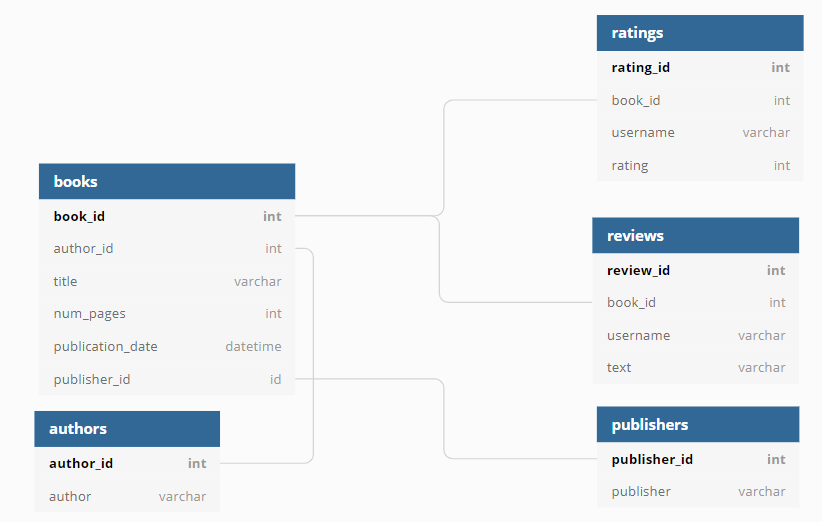

In [1]:
from IPython.display import Image
Image("DataBase_structure.png")

## <p style="text-align: center; color:green">**===============================================================================**</p>
## <p style="text-align: center; color:green"> <a id="soder">СОДЕРЖАНИЕ</a> </p>

[Импорт библиотек. Подключение к БД. Просмотр таблиц. ](#task0) 

[Задание №1](#task1)  

[Задание №2](#task2)  

[Задание №3](#task3)  

[Задание №4](#task4)  

[Задание №5](#task5)  

## <p style="text-align: center; color:green">**==============================================================================**</p>

## <a id="task0"> Импорт библиотек. Подключение к БД. Просмотр таблиц.  </a>  
[К содержанию](#soder)

* Исследуйте таблицы — выведите первые строки;

In [2]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine
import datetime as dt

In [3]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', 
 'pwd': 'Sdf4$2;d-d30pp', 
 'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
 'port': 6432, # порт подключения
 'db': 'data-analyst-final-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])

# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

for table in ['books', 'authors', 'publishers', 'ratings', 'reviews']:
    query = ''' SELECT * FROM {}; 
    '''.format(table) 

    request = pd.io.sql.read_sql(query, con = engine) 
#     print(f'Таблица - "{table}"')
    display(request.head())
    print(request.info())
    print(f'Таблица - "{table}"')
    print('====================================================================================================')

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
book_id             1000 non-null int64
author_id           1000 non-null int64
title               1000 non-null object
num_pages           1000 non-null int64
publication_date    1000 non-null object
publisher_id        1000 non-null int64
dtypes: int64(4), object(2)
memory usage: 47.0+ KB
None
Таблица - "books"


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
author_id    636 non-null int64
author       636 non-null object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB
None
Таблица - "authors"


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
publisher_id    340 non-null int64
publisher       340 non-null object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB
None
Таблица - "publishers"


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
rating_id    6456 non-null int64
book_id      6456 non-null int64
username     6456 non-null object
rating       6456 non-null int64
dtypes: int64(3), object(1)
memory usage: 201.9+ KB
None
Таблица - "ratings"


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
review_id    2793 non-null int64
book_id      2793 non-null int64
username     2793 non-null object
text         2793 non-null object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB
None
Таблица - "reviews"


***С первого взгляда, данные в порядке, пропусков нет. (Можно поменять тип в колонке publication_date - на дату)***

**Для проверки запишем каждую таблицу в ДатаФрейм**

In [4]:
query_books = ''' SELECT * FROM books; ''' 
books = pd.io.sql.read_sql(query_books, con = engine)
# books

query_reviews = ''' SELECT * FROM reviews; ''' 
reviews = pd.io.sql.read_sql(query_reviews, con = engine)
# reviews

query_ratings = ''' SELECT * FROM ratings; ''' 
ratings = pd.io.sql.read_sql(query_ratings, con = engine)
# ratings

query_publishers = ''' SELECT * FROM publishers; ''' 
publishers = pd.io.sql.read_sql(query_publishers, con = engine)
# publishers

query_authors = ''' SELECT * FROM authors; ''' 
authors = pd.io.sql.read_sql(query_authors, con = engine)
# authors

## Задание №1 <a id="task1"></a>  
[К содержанию](#soder)  

* Посчитайте, сколько книг вышло после 1 января 2000 года;

In [5]:
query1 = ''' 
SELECT COUNT(*) 
FROM books
WHERE publication_date > '2000-1-1'; 
''' 

request1 = pd.io.sql.read_sql(query1, con = engine)
# request1

print(f'После 1 января 2000 года вышло {request1.iloc[0,0]} книг')

После 1 января 2000 года вышло 819 книг


***ВЫВОД: После 1 января 2000 года вышло 819 книг***

*ПРОВЕРКА*

In [6]:
books['publication_date'] = books['publication_date'].astype('datetime64')
books[books['publication_date']>'2000-01-01']['book_id'].count()

819

## Задание №2 <a id="task2"></a>  
[К содержанию](#soder)  

* Для каждой книги посчитайте количество обзоров и среднюю оценку;

In [7]:
query2 = ''' 

SELECT 
    books.title AS book_name,
    books.book_id AS id,
    SubRev.n_rev AS reviews,
    SubRat.avg_rat AS avg_rating
FROM books LEFT JOIN 
                (SELECT
                    book_id,
                    AVG(rating) AS avg_rat
                FROM
                    ratings
                GROUP BY 
                    book_id
                ) AS SubRat ON SubRat.book_id = books.book_id
        LEFT JOIN
                (SELECT 
                    book_id,
                    COUNT(review_id) AS n_rev
                FROM
                    reviews
                GROUP BY 
                    book_id
                ) AS SubRev ON SubRev.book_id = books.book_id
                
; ''' 

request2 = pd.io.sql.read_sql(query2, con = engine)
request2

,book_name,id,reviews,avg_rating
0,The Body in the Library (Miss Marple #3),652,2.0,4.500000
1,Galápagos,273,2.0,4.500000
2,A Tree Grows in Brooklyn,51,5.0,4.250000
3,Undaunted Courage: The Pioneering First Missio...,951,2.0,4.000000
4,The Prophet,839,4.0,4.285714
...,...,...,...,...
995,Alice in Wonderland,64,4.0,4.230769
996,A Woman of Substance (Emma Harte Saga #1),55,2.0,5.000000
997,Christine,148,3.0,3.428571
998,The Magicians' Guild (Black Magician Trilogy #1),790,2.0,3.500000


---  
*ПРОВЕРКА*

In [8]:
r2 = books[['title','book_id']].merge(reviews.groupby('book_id')['review_id'].count().reset_index(), 
                                 how='left', on='book_id').merge(ratings.groupby('book_id')['rating'].mean().reset_index(), how='left', on='book_id')
r2.query('book_id == [652,273,51,951,839,64,55,148,790,828]')
# r2[r2['book_id'].isin([652,273,51,951,839])]

,title,book_id,review_id,rating
50,A Tree Grows in Brooklyn,51,5.0,4.250000
54,A Woman of Substance (Emma Harte Saga #1),55,2.0,5.000000
63,Alice in Wonderland,64,4.0,4.230769
147,Christine,148,3.0,3.428571
272,Galápagos,273,2.0,4.500000
651,The Body in the Library (Miss Marple #3),652,2.0,4.500000
789,The Magicians' Guild (Black Magician Trilogy #1),790,2.0,3.500000
827,The Plot Against America,828,2.0,3.000000
838,The Prophet,839,4.0,4.285714
950,Undaunted Courage: The Pioneering First Missio...,951,2.0,4.000000


## Задание №3 <a id="task3"></a>  
[К содержанию](#soder)  

* Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;

In [9]:
query3 = ''' 
SELECT
    T.publisher_id,
    T.publisher,
    T.n_books
FROM
    (SELECT 
        books.publisher_id AS publisher_id,
        COUNT(books.book_id) AS n_books,
        publishers.publisher AS publisher 
    FROM 
        books 
        LEFT JOIN publishers ON books.publisher_id=publishers.publisher_id

    WHERE 
        num_pages>50
    GROUP BY
        books.publisher_id,
        publishers.publisher
    ORDER BY 
        n_books DESC) AS T
LIMIT 1
; ''' 

request3 = pd.io.sql.read_sql(query3, con = engine)
request3

,publisher_id,publisher,n_books
0,212,Penguin Books,42


***ВЫВОД: Издательство, которое выпустило наибольшее число книг, 42 книги, толще 50 страниц - это "Penguin Books"***

*ПРОВЕРКА*

In [10]:
books.query('num_pages>50')[['publisher_id','num_pages', 'book_id']]. \
        groupby('publisher_id')['book_id'].count().reset_index().sort_values(by='book_id',ascending=False)

,publisher_id,book_id
207,212,42
302,309,31
111,116,25
212,217,24
31,33,19
...,...,...
83,86,1
199,204,1
200,205,1
82,85,1


In [11]:
publishers.query('publisher_id==212')

,publisher_id,publisher
211,212,Penguin Books


## Задание №4 <a id="task4"></a>  
[К содержанию](#soder)  

* Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;

### ВАРИАНТ №1

In [12]:
query4 = ''' 

SELECT 
    authors.author AS author,
    AVG(ratings.rating) AS avg_rating
    , COUNT(ratings.rating_id) AS n_ratings  
FROM books
    LEFT JOIN authors ON books.author_id = authors.author_id
    LEFT JOIN ratings ON books.book_id = ratings.book_id
GROUP BY 
    authors.author 
HAVING 
    COUNT(ratings.rating_id)>=50
ORDER BY 
    avg_rating DESC
LIMIT 5

; ''' 

request4 = pd.io.sql.read_sql(query4, con = engine)
request4

,author,avg_rating,n_ratings
0,Diana Gabaldon,4.300000,50
1,J.K. Rowling/Mary GrandPré,4.288462,312
2,Agatha Christie,4.283019,53
3,Markus Zusak/Cao Xuân Việt Khương,4.264151,53
4,J.R.R. Tolkien,4.240964,166


In [13]:
# Проверка к Варианту №1
r4 = books[['author_id','book_id']].merge(authors, on='author_id').merge(ratings, on='book_id'). \
        groupby('author').agg({'rating':'mean','rating_id':'count'})
r4.query('rating_id >= 50').sort_values(by='rating', ascending=False).head(3)


,rating,rating_id
author,,
Diana Gabaldon,4.300000,50
J.K. Rowling/Mary GrandPré,4.288462,312
Agatha Christie,4.283019,53


### Другие варианты (Так как поставленная задача была трактована по разному

<div class="alert alert-block alert-warning">
<b>Комментарии от ревьюера v3:</b>

В целом, в этом задании схема следующая:
    
1. Создать общую таблицу from books присоединив нужные нам таблицы - ratings (по book_id) и authors (по author_id)
2. Группируем по book_id и author_id
2. Добавляем фильтр HAVING COUNT(rating_id) >= 50 (достаточно одного раза)
    
и рассчитать среднюю оценку каждого автора (т.к. у некоторых несколько книг)
</div>

<div class="alert alert-block alert-info">
<b>Комментарии от студента 3: Сделал 4 Вариант. См. ниже. Наверно я все таки условие задачи, не так интерпретировал. Вот сделал как заказывали :)
</b>
</div>

### ВАРИАНТ №4

In [14]:
query4 = ''' 

SELECT 
    authors.author AS author
   , AVG(ratings.rating) AS avg_rating
FROM books
    LEFT JOIN authors ON books.author_id = authors.author_id
    LEFT JOIN ratings ON books.book_id = ratings.book_id
GROUP BY 
     books.book_id
     , authors.author_id
HAVING
    COUNT(ratings.rating_id) >=50
ORDER BY 
    AVG(ratings.rating) DESC
LIMIT 5
    
; ''' 

request4 = pd.io.sql.read_sql(query4, con = engine)
request4

,author,avg_rating
0,J.K. Rowling/Mary GrandPré,4.414634
1,J.R.R. Tolkien,4.391892
2,J.K. Rowling/Mary GrandPré,4.287500
3,Markus Zusak/Cao Xuân Việt Khương,4.264151
4,J.K. Rowling/Mary GrandPré,4.246575


***Самую высокую оценку получает - J.K. Rowling/Mary GrandPré - 4.414634 (Гарри Поттер возвращается)***

<div class="alert alert-block alert-warning">
<b>Комментарии от ревьюера v4:</b>

Запрос корректный, но ты не довел решение до конца. Суть в том, что у некоторых авторов несколько книг (о чем я предупреждал ранее). Тебе следовало добавить еще один шаг - рассчитать средний рейтинг автора по средним оценкам его книг. 
</div>

### ВАРИАНТ №5

<div class="alert alert-block alert-info">
<b>Комментарии от студента 4: Сделал 5 Вариант. См. ниже. Для меня задача определена не однозначно. Про среднее от средней были варианты. Доделал ниже. 
</b>
</div>

In [15]:
query4 = ''' 
SELECT 
    aut_avg.author,
    AVG(aut_avg.avg_rating) AS avg_avg_rating
FROM
        (SELECT 
            authors.author AS author
           , AVG(ratings.rating) AS avg_rating
        FROM books
            LEFT JOIN authors ON books.author_id = authors.author_id
            LEFT JOIN ratings ON books.book_id = ratings.book_id
        GROUP BY 
             books.book_id
             , authors.author_id
        HAVING
            COUNT(ratings.rating_id) >=50 
        ) AS aut_avg 
GROUP BY    
    aut_avg.author
ORDER BY
    avg_avg_rating DESC
LIMIT 5
    
; ''' 

request4 = pd.io.sql.read_sql(query4, con = engine)
request4

,author,avg_avg_rating
0,J.K. Rowling/Mary GrandPré,4.283844
1,Markus Zusak/Cao Xuân Việt Khương,4.264151
2,J.R.R. Tolkien,4.258446
3,Louisa May Alcott,4.192308
4,Rick Riordan,4.080645


***Самую высокую оценку получает - J.K. Rowling/Mary GrandPré - 4.283844 (Гарри Поттер ФОРЕВЕР)***

## Задание №5 <a id="task5"></a>  
[К содержанию](#soder)  
 * Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

***Из предоставленных данных непонятно (неочевидно) являются ли пользователи из таблиц `ratings` и `reviews` одними и теми же, поэтому надо это проверить.***

In [16]:
print('Кол-во пользователей в "reviews" =', reviews['username'].nunique())
print('Кол-во пользователей в "ratings" =', ratings['username'].nunique())

Кол-во пользователей в "reviews" = 160
Кол-во пользователей в "ratings" = 160


**По кол-ву совпадает, но проверим еще по множествам**

In [17]:
set(reviews['username'].unique().tolist()) == set(ratings['username'].unique().tolist())

True

***Множества идентичны. Всё в порядке это одни и теже пользователи. Можно составлять запрос.***

In [18]:
query5 = ''' 

SELECT
    AVG(Sub.n_reviews)
FROM
    (SELECT
        username,
        COUNT(review_id) AS n_reviews
    FROM
        reviews
    WHERE 
        username IN (
                SELECT 
                    username
                FROM 
                    ratings
                GROUP BY 
                    username
                HAVING 
                    COUNT(rating_id) > 50
                    )
    GROUP BY 
        username
    ) AS Sub
; ''' 

request5 = pd.io.sql.read_sql(query5, con = engine)
request5

,avg
0,24.333333


***Итак среднее количество обзоров от пользователей, которые поставили больше 50 оценок равно 24+1/3 или 24(3)***

*Проверим*

In [19]:
users = ratings.groupby('username')['rating_id'].count().reset_index()
users = users.query('rating_id > 50')
users

,username,rating_id
57,jennifermiller,53
83,martinadam,56
104,paul88,56
110,richard89,55
123,sfitzgerald,55
153,xdavis,51


In [20]:
users_lst = users["username"].tolist()
# reviews.query('username.isin(@users_lst)')
reviews.query('username in @users_lst').groupby('username')['review_id'].count().mean()

24.333333333333332